In [ ]:
### Final Assignment

In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib

import yfinance as yf
import pandas as pd
import html5lib

from bs4 import BeautifulSoup
import requests 


In [ ]:
### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
### Question 1: Use yfinance to Extract Stock Data
    ## Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload the screenshot of the results.

In [2]:
# Using the ticker function. The stock is Tesla, Inc. and its ticker symbol is TSLA

tesla = yf.Ticker("TSLA")

# With the ticker object and the function history extract information and save it in a dataframe named tesla_data. The period parameter is saved to max to get information for the maximum amount of time

tesla_data = tesla.history(period='max')

In [3]:
# Using the head function display the first 5 rows

tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
### Question 2: Use Webscraping to Extract Tesla Revenue Data
    ## Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results. Make sure you are using the data from the table named Tesla Quarterly Revenue on the website.

In [4]:
# Data retrieved from the website: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
data  = requests.get(url, headers=headers).text

# Parsing the data using the BeautifulSoup library
tesla_soup = BeautifulSoup(data, "html.parser")

# Get all tables from the website
tesla_tables = tesla_soup.find_all("table", class_="historical_data_table table")

#len (tesla_tables)


In [5]:
# Find the table we want to extract data from: table "Tesla Quarterly Revenue"

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
#print(table_index)


In [6]:
# Get the table named Tesla Quarterly Revenue. This table is in a dataframe named tesla_revenue

tesla_table =tesla_tables[table_index]

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in tesla_table.find_all('tr'):
    col = row.find_all("td")
    if col != []:
        date = col[0].text
        revenue = col[1].text.replace(',','').replace('$','')

        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

#tesla_revenue

In [7]:
# Last five rows of the tesla_revenue dataframe using the tail function

tesla_revenue.tail()

,Date,Revenue
59,2010-06-30,28
60,2010-03-31,21
61,2009-12-31,
62,2009-09-30,46
63,2009-06-30,27


In [ ]:
### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
### Question 3: Use yfinance to Extract Stock Data
    ## Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results.

In [8]:
# Using the ticker function. The stock is GameStop, Corp. and its ticker symbol is GME

gamestop = yf.Ticker("GME")

# With the ticker object and the function history extract information and save it in a dataframe named tesla_data. 
#The period parameter is saved to max to get information for the maximum amount of time
gamestop_data = gamestop.history(period='max')

In [9]:
# Using the head function display the first 5 rows
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
### Question 4: Use Webscraping to Extract GME Revenue Data
    ## Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results. Make sure you are using the data from the table named GameStop Quarterly Revenue on the website.

In [10]:
# Data retrieved from the website: https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {"User-Agent": "Mozilla/5.0"}
data  = requests.get(url, headers=headers).text

# Parsing the data using the BeautifulSoup library
gme_soup = BeautifulSoup(data, "html.parser")

# Get all tables from the website
gme_tables = gme_soup.find_all("table", class_="historical_data_table table")

#len (gme_tables)


In [11]:
# Find the table we want to extract data from: table " GameStop Quarterly Revenue"

for index,table in enumerate(gme_tables):
    if (" GameStop Quarterly Revenue" in str(table)):
        table_index = index
#print(table_index)


In [12]:
# Get the table named GameStop Quarterly Revenue. This table is in a dataframe named gme_revenue

gme_table = gme_tables[table_index]

gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in gme_table.find_all('tr'):
    col = row.find_all("td")
    if col != []:
        date = col[0].text
        revenue = col[1].text.replace(',','').replace('$','')

        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

#gme_revenue

In [13]:
# Last five rows of the gme_revenue dataframe using the tail function

gme_revenue.tail()


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


In [14]:
# this cell of code is going to be used for Q5 and Q6

# necessary to install / import
!pip install matplotlib
import matplotlib.pyplot as plt

# make_graph function to plot the stock closing values by date
def make_graph(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price in USD")
    plt.grid(True)
    plt.show()
    

In [ ]:
### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
### Question 5: Plot Tesla Stock Graph
    ## Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.
    ## Upload a screenshot of your results.

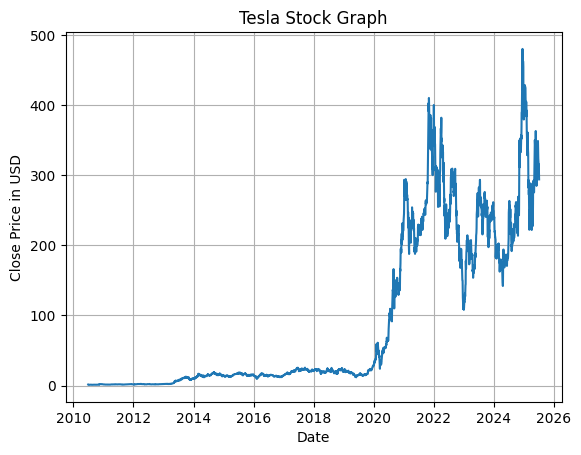

In [15]:
# Calling the make_graph function to plot the Tesla Stock Data, with a title and labels

x = tesla_data['Date']

y = tesla_data['Close']

title = 'Tesla Stock Graph'

make_graph(x, y, title)

In [ ]:
### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
### Question 6: Plot GameStop Stock Graph
    ## Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.
    ## Upload a screenshot of your results.

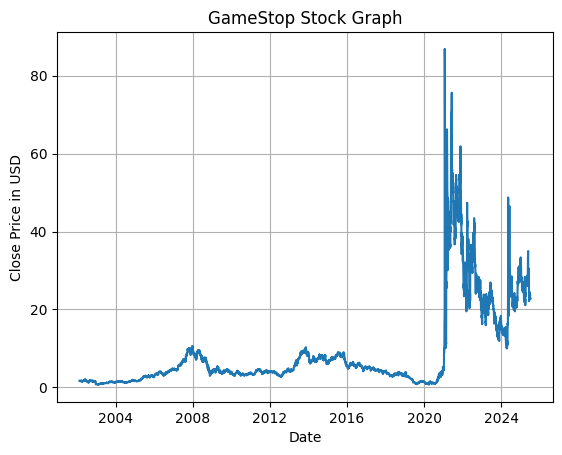

In [16]:
# Calling the make_graph function to plot the GameStop Stock Data, with a title and labels

x = gamestop_data['Date']

y = gamestop_data['Close']

title = 'GameStop Stock Graph'

make_graph(x, y, title)

In [ ]:
### Question 7 - Sharing your Assignment Notebook - 2 Points
### Question 7: Add the GitHub link or the URL to your assignment in Watson Studio using the share notebook lab instructions.